In [182]:
import datacube
%matplotlib inline
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf') 

In [183]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,lat,product_type,time,format,lon,platform,instrument,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
7,ls7_lasrc_taiwan,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LEDAPS,None,NetCDF,None,LANDSAT_7,ETM,EPSG:4326,"[-0.000270824429276318, 0.000270824429276318]","[0.947885502467113, 0.947885502467113]","(latitude, longitude)"
2,ls7_ledaps_general,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LEDAPS,None,NetCDF,None,LANDSAT_7,ETM,EPSG:4326,"[-0.000269494585236, 0.000269494585236]","[0.943231048326, 0.943231048326]","(latitude, longitude)"
6,ls8_lasrc_taiwan,Landsat 8 USGS Collection 1 Higher Level SR sc...,None,LaSRC,None,NetCDF,None,LANDSAT_8,OLI_TIRS,EPSG:4326,"[-0.000270824429276318, 0.000270824429276318]","[0.947885502467113, 0.947885502467113]","(latitude, longitude)"
8,s1_gamma0a_taiwan,"Sentinel-1A/B SAR Gamma0, processed to the CEO...",None,gamma0,None,NetCDF,None,SENTINEL_1,SAR,EPSG:4326,"[-9.02748097587726e-05, 9.02748097587726e-05]","[0.315961835, 0.315961835]","(latitude, longitude)"
4,s1_gamma0_taiwan,"Sentinel-1A/B SAR Gamma0, processed to the CEO...",None,gamma0,None,NetCDF,None,SENTINEL_1,SAR,EPSG:4326,"[-9.02748097587726e-05, 9.02748097587726e-05]","[0.315961834155704, 0.315961834155704]","(latitude, longitude)"
12,UAV_albers,"Landsat 5 LEDAPS 25 metre, 100km tile, Austral...",None,UAV_type,None,NetCDF,None,None,None,EPSG:3826,"[-30, 30]","[100000.0, 100000.0]","(y, x)"


In [184]:
list_of_measurements = dc.list_measurements()
list_of_measurements

aliases  \
product                  measurement                                                  
formosa2_Test            pancromatic                                          [Pan]   
formosa2_Test2           pancromatic                                          [Pan]   
ls5_level1_usgs          blue                                        [band_1, blue]   
                         green                                      [band_2, green]   
                         red                                          [band_3, red]   
                         nir                                          [band_4, nir]   
                         swir1                                      [band_5, swir1]   
                         swir2                                      [band_7, swir2]   
                         quality                                 [QUALITY, quality]   
ls5_usgs_sr_scene        blue                                    [band_1, sr_band1]   
                         green                                   [band_2, sr_band2]   
                         red                                     [band_3, sr_band3]   
                         nir                                     [band_4, sr_band4]   
                         swir1                                   [band_5, sr_band5]   
                         swir2                                   [band_7, sr_band7]   
                         lwir                                    [band_6, bt_band6]   
                         pixel_qa                                        [pixel_qa]   
ls7_collections_sr_scene sr_band1                                    [band_1, blue]   
                         sr_band2                                   [band_2, green]   
                         sr_band3                                     [band_3, red]   
                         sr_band4                                     [band_4, nir]   
                         sr_band5                                   [band_5, swir1]   
                         sr_band7                                   [band_7, swir2]   
                         sr_atmos_opacity                                [atmos_op]   
                         pixel_qa                                        [pixel_qa]   
                         radsat_qa                                      [radsat_qa]   
                         sr_cloud_qa                                     [cloud_qa]   
                         solar_azimuth_band4                  [solar_azimuth_band4]   
                         solar_zenith_band4                    [solar_zenith_band4]   
                         sensor_azimuth_band4                [sensor_azimuth_band4]   
...                                                                             ...   
ls8_level1_usgs          cirrus                                    [band_9, cirrus]   
                         lwir1                                     [band_10, lwir1]   
                         lwir2                                     [band_11, lwir2]   
                         quality                                 [QUALITY, quality]   
ls8_usgs_sr_scene        coastal_aerosol                         [band_1, sr_band1]   
                         blue                                    [band_2, sr_band2]   
                         green                                   [band_3, sr_band3]   
                         red                                     [band_4, sr_band4]   
                         nir                                     [band_5, sr_band5]   
                         swir1                                   [band_6, sr_band6]   
                         swir2                                   [band_7, sr_band7]   
                         lwir1                                 [band_10, bt_band10]   
                         lwir2                                 [band_11, bt_band11]   
                         pixel_qa                                        [

In [185]:
desired_bands = ['red','green','blue','nir','swir1','swir2','pixel_qa']  

In [186]:
import datetime
date_range =(datetime.datetime(2016,1,1), 
datetime.datetime(2016,12,31))

lon = (121.254519, 121.746372)
lat = (24.754843, 25.262439)
# 目前設為整個台北市

platform = 'LANDSAT_8' 

product = 'ls8_lasrc_taiwan'

desired_bands = ['red','green','blue','nir','swir1','swir2','pixel_qa']  

data = dc.load(product = product,platform = platform, lat = lat,lon = lon,time = date_range, measurements = desired_bands, group_by='solar_day')
data
#可能會需要一些時間來load資料

<xarray.Dataset>
Dimensions:    (latitude: 1875, longitude: 1817, time: 22)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-03T02:20:54 2016-01-19T02:20:54 ...
  * latitude   (latitude) float64 25.26 25.26 25.26 25.26 25.26 25.26 25.26 ...
  * longitude  (longitude) float64 121.3 121.3 121.3 121.3 121.3 121.3 121.3 ...
Data variables:
    red        (time, latitude, longitude) int16 1309 1399 1507 1620 1672 ...
    green      (time, latitude, longitude) int16 1268 1378 1485 1567 1601 ...
    blue       (time, latitude, longitude) int16 1357 1408 1484 1603 1749 ...
    nir        (time, latitude, longitude) int16 1831 1886 1976 2094 2162 ...
    swir1      (time, latitude, longitude) int16 1043 1078 1107 1144 1148 ...
    swir2      (time, latitude, longitude) int16 622 648 666 682 697 702 688 ...
    pixel_qa   (time, latitude, longitude) int32 480 480 480 480 480 480 480 ...
Attributes:
    crs:      EPSG:4326

In [187]:
%matplotlib inline
from matplotlib import pyplot as plt
cloud_free_green = data.green.where(data.green > 0).where(data.pixel_qa == 322)
#cloud_free.plot(col='time', col_wrap=3)
cloud_free_red = data.red.where(data.red > 0).where(data.pixel_qa == 322)
cloud_free_blue = data.blue.where(data.blue > 0).where(data.pixel_qa == 322)
cloud_free_nir = data.nir.where(data.nir > 0).where(data.pixel_qa == 322)
cloud_free_swir1 = data.swir1.where(data.swir1 > 0).where(data.pixel_qa == 322)
cloud_free_swir2 = data.swir2.where(data.swir2 > 0).where(data.pixel_qa == 322)

In [188]:
combine_green = cloud_free_green.median(dim='time').fillna(0)
combine_red = cloud_free_red.median(dim='time').fillna(0)
combine_blue = cloud_free_blue.median(dim='time').fillna(0)
combine_nir = cloud_free_nir.median(dim='time').fillna(0)
combine_swir1 = cloud_free_swir1.median(dim='time').fillna(0)
combine_swir2 = cloud_free_swir2.median(dim='time').fillna(0)

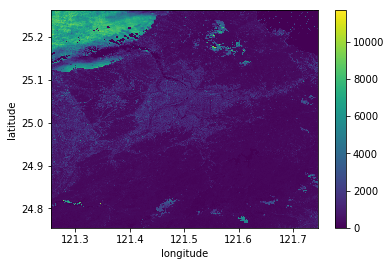

In [314]:
combine_red.plot()

In [189]:
combine = combine_green.to_dataset(name = "green")
combine = combine.merge(combine_red.to_dataset(name = "red"))
combine = combine.merge(combine_blue.to_dataset(name = "blue"))
combine = combine.merge(combine_nir.to_dataset(name = "nir"))
combine = combine.merge(combine_swir1.to_dataset(name = "swir1"))
combine = combine.merge(combine_swir2.to_dataset(name = "swir2"))
combine

<xarray.Dataset>
Dimensions:    (latitude: 1875, longitude: 1817)
Coordinates:
  * latitude   (latitude) float64 25.26 25.26 25.26 25.26 25.26 25.26 25.26 ...
  * longitude  (longitude) float64 121.3 121.3 121.3 121.3 121.3 121.3 121.3 ...
Data variables:
    green      (latitude, longitude) float64 3.904e+03 3.849e+03 3.847e+03 ...
    red        (latitude, longitude) float64 4.127e+03 4.054e+03 4.059e+03 ...
    blue       (latitude, longitude) float64 4.088e+03 4.029e+03 4.089e+03 ...
    nir        (latitude, longitude) float64 4.232e+03 4.133e+03 4.127e+03 ...
    swir1      (latitude, longitude) float64 3.218e+03 3.194e+03 3.087e+03 ...
    swir2      (latitude, longitude) float64 2.537e+03 2.497e+03 2.386e+03 ...

In [285]:
ndvi = ((combine_nir - combine_red) / (combine_nir + combine_red))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


In [286]:
ndvi = ndvi.fillna(0)

In [192]:
combine = combine.merge(ndvi.to_dataset(name = "ndvi"))

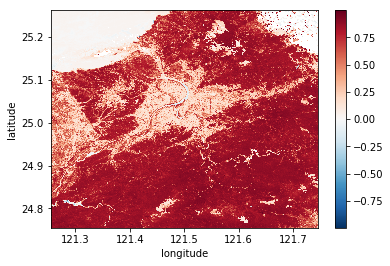

In [42]:
ndvi.plot()

In [203]:
ndbi_swir1 = ((combine_swir1 - combine_nir) / (combine_swir1 + combine_nir))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


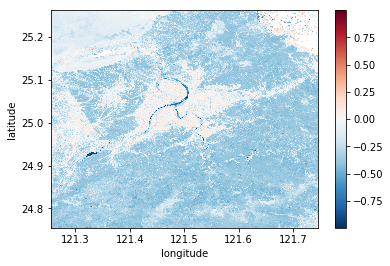

In [46]:
ndbi_swir1.plot()

In [47]:
ndbi_swir2 = ((combine_swir2 - combine_nir) / (combine_swir2 + combine_nir))

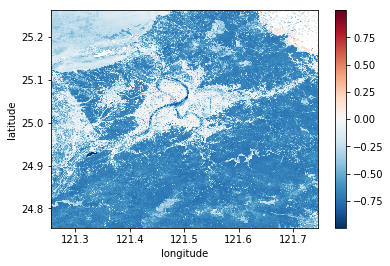

In [48]:
ndbi_swir2.plot()

In [302]:
mndwi_swir1 = ((combine_green - combine_swir1) / (combine_green + combine_swir1))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


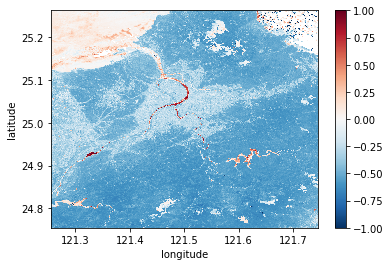

In [303]:
mndwi_swir1.plot()

In [304]:
mndwi_swir2 = ((combine_green - combine_swir2) / (combine_green + combine_swir2))

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


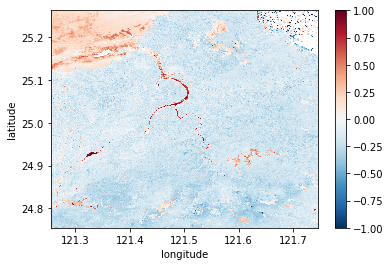

In [305]:
mndwi_swir2.plot()

In [100]:
from utils.dc_clustering import kmeans_cluster_dataset
classification_4 = kmeans_cluster_dataset(combine, n_clusters=4)
classification_8 = kmeans_cluster_dataset(combine, n_clusters=8)
classification_16 = kmeans_cluster_dataset(combine, n_clusters=16)

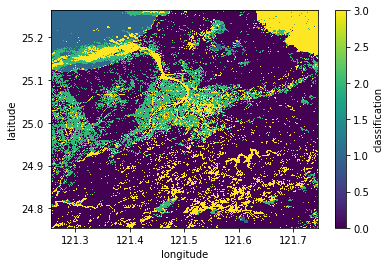

In [107]:
classification_4.classification.plot()

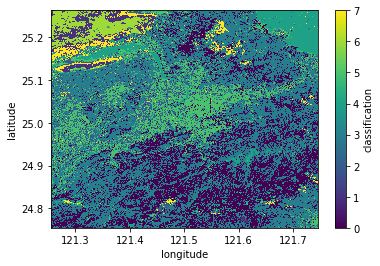

In [108]:
classification_8.classification.plot()

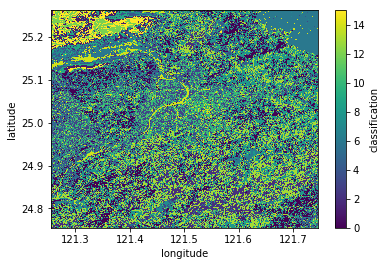

In [109]:
classification_16.classification.plot()

In [110]:
urban_classification_4 = classification_4.where(classification_4 == 2)

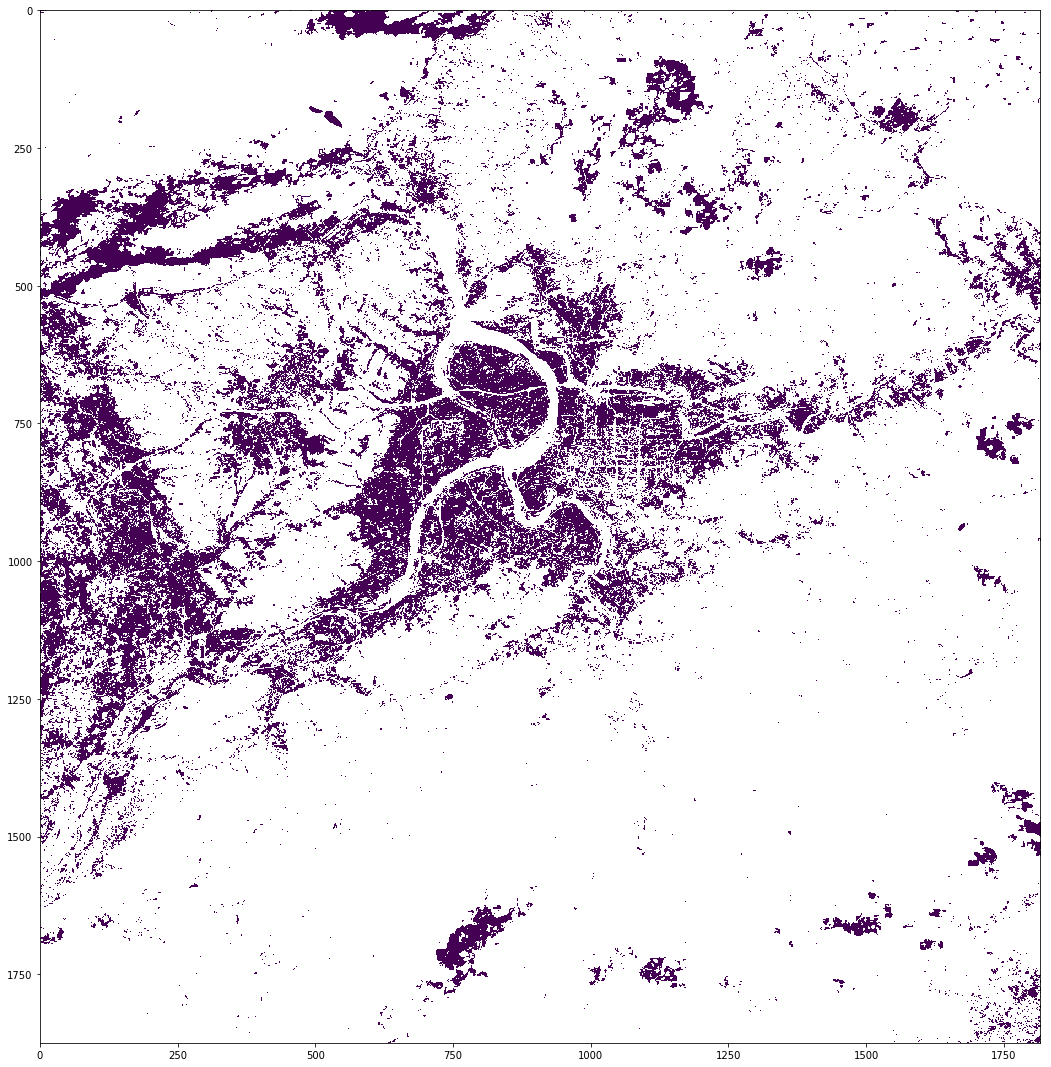

In [141]:
#urban_classification_4.classification.plot()
#urban_classification_16.classification.plot()
max_val = urban_classification_4.classification.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (urban_classification_4.classification / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [112]:
urban_classification_8 = classification_8.where(classification_8 == 5)

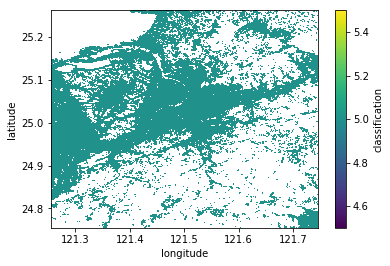

In [113]:
urban_classification_8.classification.plot()

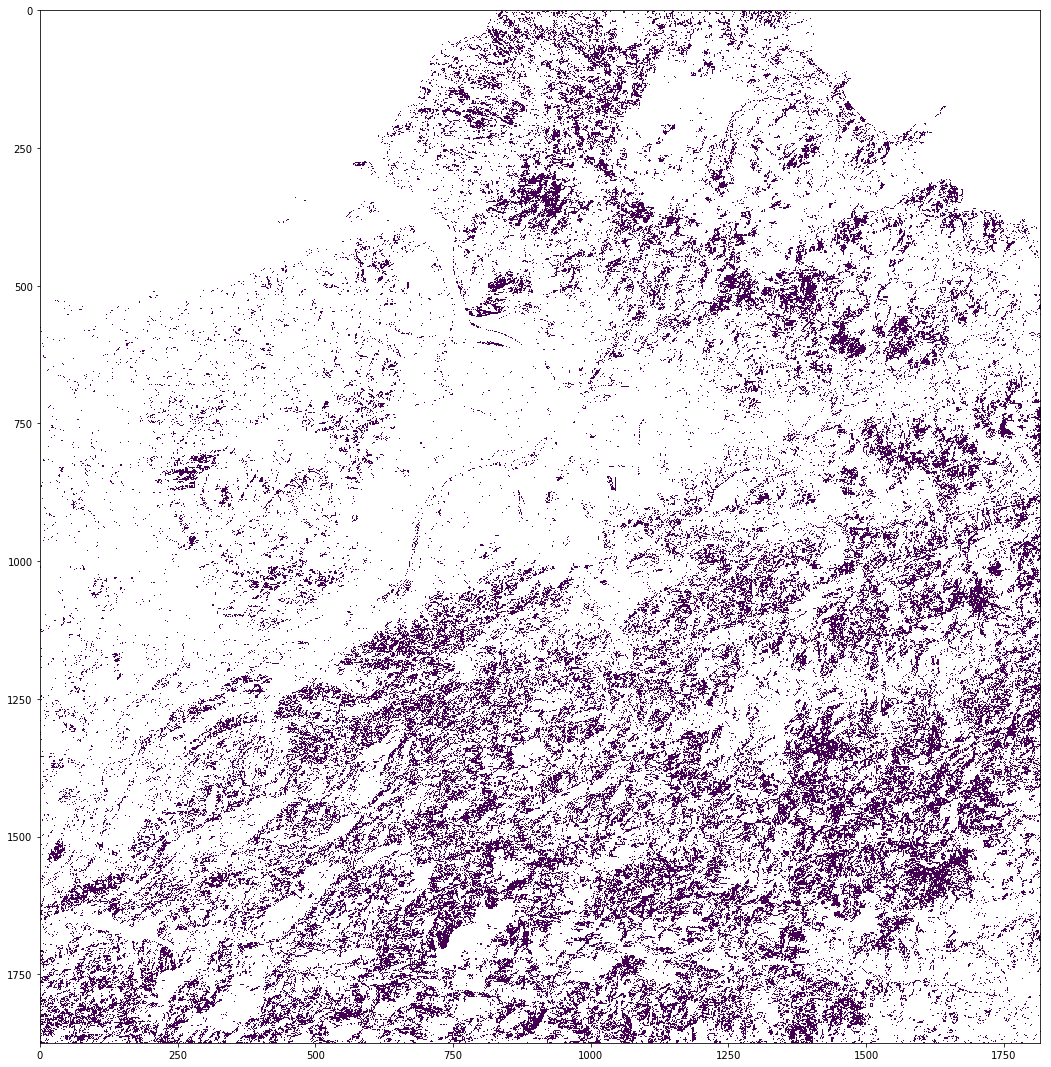

In [139]:
urban_classification_16 = classification_16.where(classification_16 == 13)
#urban_classification_16.classification.plot()
max_val = urban_classification_16.classification.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (urban_classification_16.classification / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

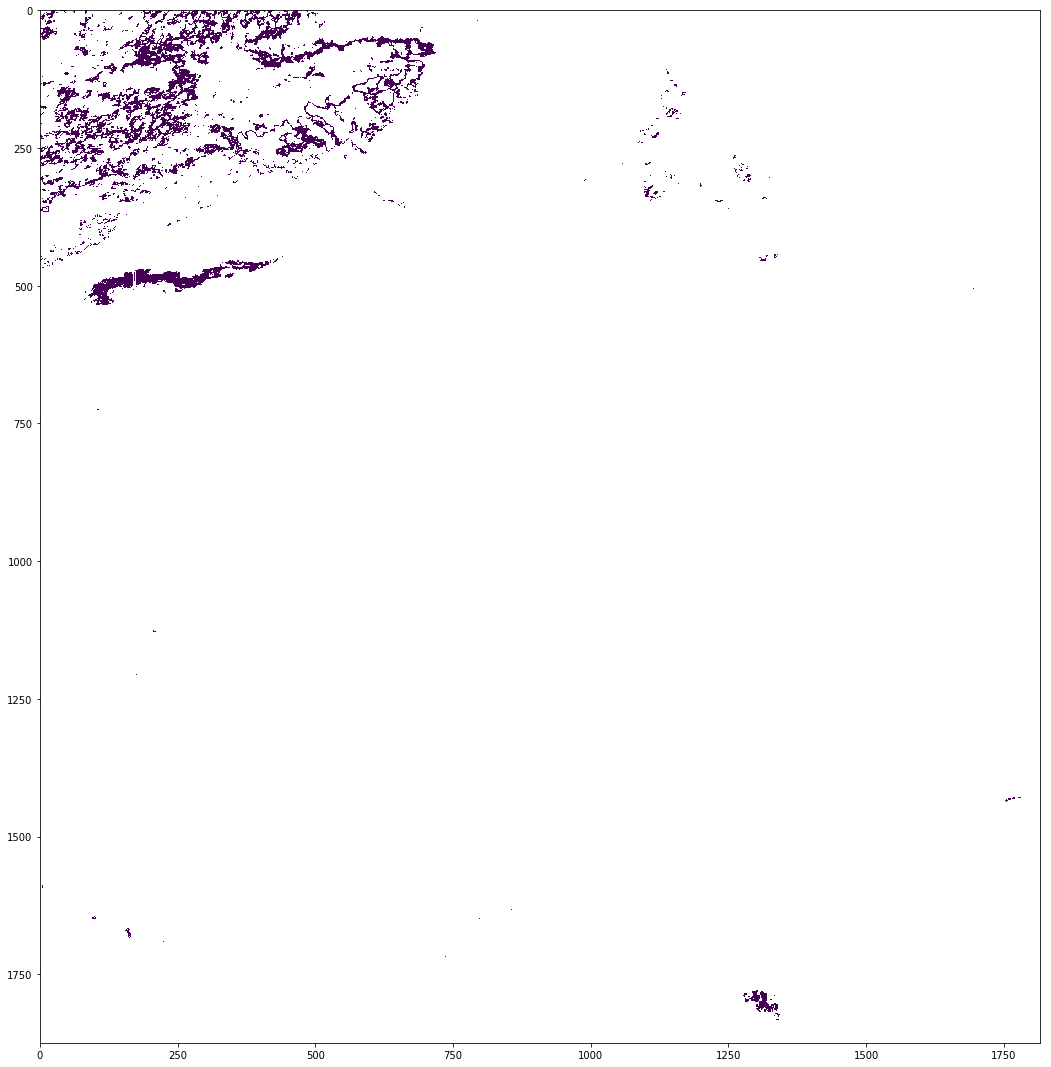

In [127]:
#urban_classification_16.classification.plot()
max_val = urban_classification_16.classification.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (urban_classification_16.classification / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [206]:
ndvi_01

<xarray.DataArray (latitude: 1875, longitude: 1817)>
array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * latitude   (latitude) float64 25.26 25.26 25.26 25.26 25.26 25.26 25.26 ...
  * longitude  (longitude) float64 121.3 121.3 121.3 121.3 121.3 121.3 121.3 ...

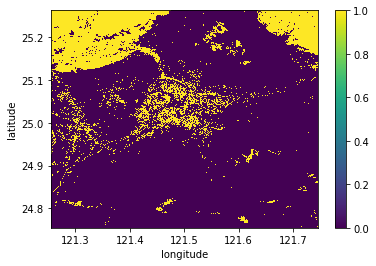

In [307]:
ndvi_01.plot()

In [235]:
import numpy as np
ndvi_01 = ndvi.where(ndvi < 2, 1)

NotImplementedError: The optional argument 'other' has not yet been implemented

In [274]:
import numpy as np
import xarray as xr
a = xr.DataArray(np.arange(25).reshape(5, 5), dims=('x', 'y'))
b = a.values
c = np.where(b < 5, 0, b)

In [277]:
d = xr.DataArray(c, dims=('x', 'y'))

In [279]:
d.dims

('x', 'y')

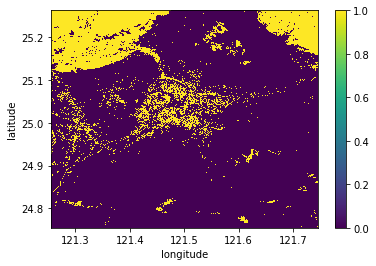

In [313]:
ndvi_01 = ndvi.values
ndvi_01 = np.where((ndvi_01 <= 0.2) & (ndvi_01 >= 0), 1, 0)
ndvi_01 = xr.DataArray(ndvi_01, dims = ndvi.dims, coords = ndvi.coords)
ndvi_01.plot()

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


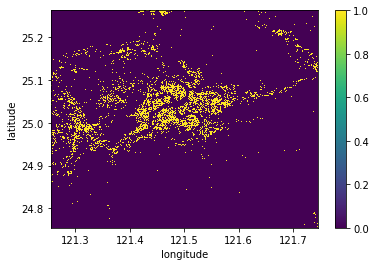

In [306]:
ndbi_swir1_01 = ndbi_swir1.values
ndbi_swir1_01 = np.where((ndbi_swir1_01 <= 0.1) & (ndbi_swir1_01 >= 0), 1, 0)
ndbi_swir1_01 = xr.DataArray(ndbi_swir1_01, dims = ndbi_swir1.dims, coords = ndbi_swir1.coords)
ndbi_swir1_01.plot()

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


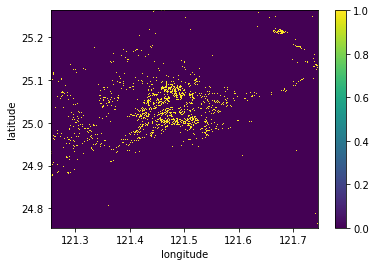

In [308]:
ndbi_swir2_01 = ndbi_swir2.values
ndbi_swir2_01 = np.where((ndbi_swir2_01 <= 0.1) & (ndbi_swir2_01 >= 0), 1, 0)
ndbi_swir2_01 = xr.DataArray(ndbi_swir2_01, dims = ndbi_swir2.dims, coords = ndbi_swir2.coords)
ndbi_swir2_01.plot()

In [311]:
cfmask = xr.DataArray(np.where(data.pixel_qa.values == 322,0,1), dims = data.pixel_qa.dims, coords = data.pixel_qa.coords)
combine = combine.merge(cfmask.to_dataset(name = "cf_mask"))
mosaic_cfmask = combine.cf_mask
mosaic_clean_mask = np.in1d(mosaic_cfmask.values.reshape(-1), [0])
band_stack = []

for band in [combine.blue.values, combine.green.values, combine.red.values,
             combine.nir.values, combine.swir1.values, combine.swir2.values]:
    band = band.astype(np.float32)
    band = band * 0.0001 
    band = band.flatten()
    band_clean = np.full(band.shape, np.nan)
    band_clean[mosaic_clean_mask] = band[mosaic_clean_mask]
    band_stack.append(band_clean)
    
band_stack = np.array(band_stack).transpose()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3406875 but corresponding boolean dimension is 74951250